In [1]:
#Q1: Comparing winners' booking performances Vs non-winners's booking performances


In [2]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
matches=pd.read_csv('matches.csv')

home_matches=matches.groupby( ['tournament_id', 'home_team_name'] ).agg({'match_id': 'count'}).reset_index() 
home_matches = home_matches.rename( columns={ 'match_id': 'home_matches_number', 'home_team_name': 'team_name' } )

away_matches=matches.groupby( ['tournament_id', 'away_team_name'] ).agg({'match_id': 'count'}).reset_index() 
away_matches = away_matches.rename( columns={ 'match_id': 'away_matches_number', 'away_team_name': 'team_name' } )

match_number = home_matches.merge( away_matches, on=['tournament_id', 'team_name'], how='outer' )
match_number.loc[ match_number['home_matches_number'].isna(), 'home_matches_number' ] = 0
match_number.loc[ match_number['away_matches_number'].isna(), 'away_matches_number' ] = 0

match_number['total_match_number'] = match_number['home_matches_number'] + match_number['away_matches_number']

match_number.head() 

,tournament_id,team_name,home_matches_number,away_matches_number,total_match_number
0,WC-1930,Argentina,4.0,1.0,5.0
1,WC-1930,Brazil,1.0,1.0,2.0
2,WC-1930,Chile,2.0,1.0,3.0
3,WC-1930,France,1.0,2.0,3.0
4,WC-1930,Paraguay,1.0,1.0,2.0


In [4]:
tournament_data= pd.read_csv('tournaments.csv')
bookings_data= pd.read_csv('bookings.csv')
pd.set_option('display.max_columns', None)
bookings_data.head()

,key_id,booking_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,team_code,home_team,away_team,player_id,family_name,given_name,shirt_number,minute_label,minute_regulation,minute_stoppage,match_period,yellow_card,red_card,second_yellow_card,sending_off
0,1,B-0001,WC-1970,1970 FIFA World Cup,M-1970-01,Mexico v Soviet Union,1970-05-31,group stage,Group 1,T-69,Soviet Union,SUN,0,1,P-07448,Asatiani,Kakhi,11,30',30,0,first half,1,0,0,0
1,2,B-0002,WC-1970,1970 FIFA World Cup,M-1970-01,Mexico v Soviet Union,1970-05-31,group stage,Group 1,T-69,Soviet Union,SUN,0,1,P-07350,Nodia,Givi,19,31',31,0,first half,1,0,0,0
2,3,B-0003,WC-1970,1970 FIFA World Cup,M-1970-01,Mexico v Soviet Union,1970-05-31,group stage,Group 1,T-69,Soviet Union,SUN,0,1,P-00603,Lovchev,Evgeny,6,34',34,0,first half,1,0,0,0
3,4,B-0004,WC-1970,1970 FIFA World Cup,M-1970-01,Mexico v Soviet Union,1970-05-31,group stage,Group 1,T-44,Mexico,MEX,1,0,P-09033,Peña,Gustavo,3,60',60,0,second half,1,0,0,0
4,5,B-0005,WC-1970,1970 FIFA World Cup,M-1970-01,Mexico v Soviet Union,1970-05-31,group stage,Group 1,T-69,Soviet Union,SUN,0,1,P-04868,Logofet,Gennady,7,72',72,0,second half,1,0,0,0


In [5]:
tournament_data = tournament_data.rename( columns={'winner': 'team_name'} )
#display of dataframe
tournament_data.head() 

,key_id,tournament_id,tournament_name,year,start_date,end_date,host_country,team_name,host_won,count_teams,group_stage,second_group_stage,final_round,round_of_16,quarter_finals,semi_finals,third_place_match,final
0,1,WC-1930,1930 FIFA World Cup,1930,1930-07-13,1930-07-30,Uruguay,Uruguay,1,13,1,0,0,0,0,1,0,1
1,2,WC-1934,1934 FIFA World Cup,1934,1934-05-27,1934-06-10,Italy,Italy,1,16,0,0,0,1,1,1,1,1
2,3,WC-1938,1938 FIFA World Cup,1938,1938-06-04,1938-06-19,France,Italy,0,15,0,0,0,1,1,1,1,1
3,4,WC-1950,1950 FIFA World Cup,1950,1950-06-24,1950-07-16,Brazil,Uruguay,0,13,1,0,1,0,0,0,0,0
4,5,WC-1954,1954 FIFA World Cup,1954,1954-06-16,1954-07-04,Switzerland,West Germany,0,16,1,0,0,0,1,1,1,1


In [6]:
bookings_data=bookings_data[['booking_id', 'match_id', 'yellow_card', 'red_card', 'team_name', 'tournament_id' ]]
bookings_data

,booking_id,match_id,yellow_card,red_card,team_name,tournament_id
0,B-0001,M-1970-01,1,0,Soviet Union,WC-1970
1,B-0002,M-1970-01,1,0,Soviet Union,WC-1970
2,B-0003,M-1970-01,1,0,Soviet Union,WC-1970
3,B-0004,M-1970-01,1,0,Mexico,WC-1970
4,B-0005,M-1970-01,1,0,Soviet Union,WC-1970
...,...,...,...,...,...,...
2461,B-2462,M-2018-63,1,0,England,WC-2018
2462,B-2463,M-2018-63,1,0,Belgium,WC-2018
2463,B-2464,M-2018-64,1,0,France,WC-2018
2464,B-2465,M-2018-64,1,0,France,WC-2018


In [7]:
winner_booking_info= tournament_data.merge( bookings_data, on=['tournament_id', 'team_name'], how='inner' )
winner_booking_info = winner_booking_info.sort_values('tournament_id')
winner_booking_info.head() 

,key_id,tournament_id,tournament_name,year,start_date,end_date,host_country,team_name,host_won,count_teams,group_stage,second_group_stage,final_round,round_of_16,quarter_finals,semi_finals,third_place_match,final,booking_id,match_id,yellow_card,red_card
0,9,WC-1970,1970 FIFA World Cup,1970,1970-05-31,1970-06-21,Mexico,Brazil,0,16,1,0,0,0,1,1,1,1,B-0007,M-1970-07,1,0
1,9,WC-1970,1970 FIFA World Cup,1970,1970-05-31,1970-06-21,Mexico,Brazil,0,16,1,0,0,0,1,1,1,1,B-0042,M-1970-29,1,0
2,9,WC-1970,1970 FIFA World Cup,1970,1970-05-31,1970-06-21,Mexico,Brazil,0,16,1,0,0,0,1,1,1,1,B-0052,M-1970-32,1,0
3,10,WC-1974,1974 FIFA World Cup,1974,1974-06-13,1974-07-07,West Germany,West Germany,1,16,1,1,0,0,0,0,1,1,B-0113,M-1974-25,1,0
4,10,WC-1974,1974 FIFA World Cup,1974,1974-06-13,1974-07-07,West Germany,West Germany,1,16,1,1,0,0,0,0,1,1,B-0114,M-1974-25,1,0


In [8]:
winner_booking_info=winner_booking_info.groupby(['tournament_id', 'team_name']).agg( {'yellow_card': 'sum', 'red_card': 'sum'} ).reset_index()
winner_booking_info=winner_booking_info.rename(columns={'team_name' : 'winner_teams'})

winner_booking_info['Time'] = winner_booking_info.index.values

winner_booking_info = winner_booking_info.merge( match_number, left_on=['tournament_id', 'winner_teams'], right_on=['tournament_id', 'team_name'], how='left' )

winner_booking_info['avg_yellow_card'] = winner_booking_info['yellow_card'] / winner_booking_info['total_match_number']
winner_booking_info['avg_red_card'] = winner_booking_info['red_card'] / winner_booking_info['total_match_number']

non_winner_booking_info
winner_booking_info

NameError: name 'non_winner_booking_info' is not defined

In [ ]:
x_values = winner_booking_info['Time']
y_values = winner_booking_info['avg_yellow_card']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( x_values, y_values )
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Time")
plt.ylabel('Average number of yellow cards per game')
plt.show()

In [ ]:
non_winner_booking_info = bookings_data.merge( tournament_data[ [ 'tournament_id', 'team_name' ] ], \
                      how='outer', left_on=['tournament_id', 'team_name'], \
                      right_on=['tournament_id', 'team_name'], indicator=True )

non_winner_booking_info = non_winner_booking_info.loc[ non_winner_booking_info['_merge'] == 'left_only' ]

non_winner_booking_info.head() 

In [ ]:
#checking if anti-merge worked
non_winner_booking_info.loc[ non_winner_booking_info['tournament_id'] == 'WC-1974', 'team_name' ].unique()

In [ ]:
non_winner_booking_info=non_winner_booking_info.groupby(['tournament_id', 'team_name']).agg( {'yellow_card': 'sum', 'red_card': 'sum'} ).reset_index()
non_winner_booking_info=non_winner_booking_info.rename(columns={'team_name' : 'non_winner_teams'})

non_winner_booking_info

In [ ]:
match_number.loc[ match_number['home_matches_number'].isna(), : ]

In [ ]:
match_number.isna().any() 

In [ ]:
non_winner_booking_info = non_winner_booking_info.merge( match_number, left_on=['tournament_id', 'non_winner_teams'], right_on=['tournament_id', 'team_name'], how='left' )

non_winner_booking_info

In [ ]:
non_winner_booking_info['avg_yellow_card'] = non_winner_booking_info['yellow_card'] / non_winner_booking_info['total_match_number']
non_winner_booking_info['avg_red_card'] = non_winner_booking_info['red_card'] / non_winner_booking_info['total_match_number']

non_winner_booking_info

In [ ]:
winner_booking_info.describe()

In [ ]:
non_winner_booking_info.describe()

In [ ]:
#End of Mya's Data Transformation Code
#Start of Elsa's Visualization Code

In [ ]:
#Will do box and whiskers visualization for both winner and non winning teams to show range and outliers

In [ ]:
#need to group non_winner booking info by tournament so that there are the same number of rows as winning booking info table (0-12)
non_winner_booking_tourn_info = non_winner_booking_info.groupby(['tournament_id']).agg( {'avg_yellow_card': 'mean', 'avg_red_card': 'mean'} ).reset_index()
non_winner_booking_tourn_info

In [ ]:
non_winner_booking_tourn_info['Time'] = non_winner_booking_tourn_info.index.values
non_winner_booking_tourn_info

In [ ]:
x_values = non_winner_booking_tourn_info['Time']
y_values = non_winner_booking_tourn_info['avg_yellow_card']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( x_values, y_values )
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Time")
plt.ylabel('Average number of yellow cards per game')
plt.show()

In [ ]:
#boxplot code for winner_booking_info

#we need a list of the tournament_id's for the x axis and then the count of card will be the y Axis
tournaments = winner_booking_info["tournament_id"].values
winner_yellow_card_count= winner_booking_info["avg_yellow_card"].values
winner_red_card_count= winner_booking_info["avg_red_card"].values

tournaments = winner_booking_info["tournament_id"].values
nonwinner_yellow_card_count= non_winner_booking_tourn_info["avg_yellow_card"].values
nonwinner_red_card_count= non_winner_booking_tourn_info["avg_red_card"].values



In [ ]:
boxplot = winner_booking_info.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Card Count')
#boxplot.set_xlabel('')
plt.ylim(0,25)
#boxplot.set_title('Winner Booking Data')

In [ ]:
boxplot = non_winner_booking_info.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Card Count')
boxplot.set_xlabel('')
boxplot.set_title('NonWinner Booking Data')

In [9]:
boxplot = non_winner_booking_tourn_info.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Card Count')
boxplot.set_xlabel('')
boxplot.set_title('NonWinner Average Booking Data')

NameError: name 'non_winner_booking_tourn_info' is not defined

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(tournaments, winner_yellow_card_count ,s =55, facecolors="yellow", edgecolors="black")
plt.scatter(tournaments, winner_red_card_count ,s =55, facecolors="red", edgecolors="black")
plt.xlabel("Tournaments")
plt.xticks(rotation=45)
plt.ylabel("Card Count")
plt.ylim(0,13)
plt.title("Tournament Winner Booking Data")
plt.show()

NameError: name 'tournaments' is not defined

<Figure size 720x720 with 0 Axes>

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(tournaments, nonwinner_yellow_card_count ,s =55, facecolors="yellow", edgecolors="black")
plt.scatter(tournaments, nonwinner_red_card_count ,s =55, facecolors="red", edgecolors="black")
plt.xlabel("Tournaments")
plt.xticks(rotation=45)
plt.ylabel("Card Count")
plt.ylim(0,13)
plt.title("Tournament Non-Winner Average Booking Data")
plt.show()

NameError: name 'tournaments' is not defined

<Figure size 720x720 with 0 Axes>

In [12]:
#non_winner_booking_info

#tournaments = winner_booking_info["tournament_id"].values
#non_winner_yellow_card_count= non_winner_booking_info["avg_yellow_card"].values
#non_winner_red_card_count= non_winner_booking_info["avg_red_card"].values

#plt.figure(figsize=(10,10))
#plt.scatter(tournaments, non_winner_yellow_card_count ,s =55, facecolors="yellow", edgecolors="black")
#plt.scatter(tournaments, non_winner_red_card_count ,s =55, facecolors="red", edgecolors="black")
#plt.xlabel("Tournaments")
#plt.xticks(rotation=45)
#plt.ylabel("Card Count")
#plt.title("Tournament Non-Winner Booking Data")
#plt.show()

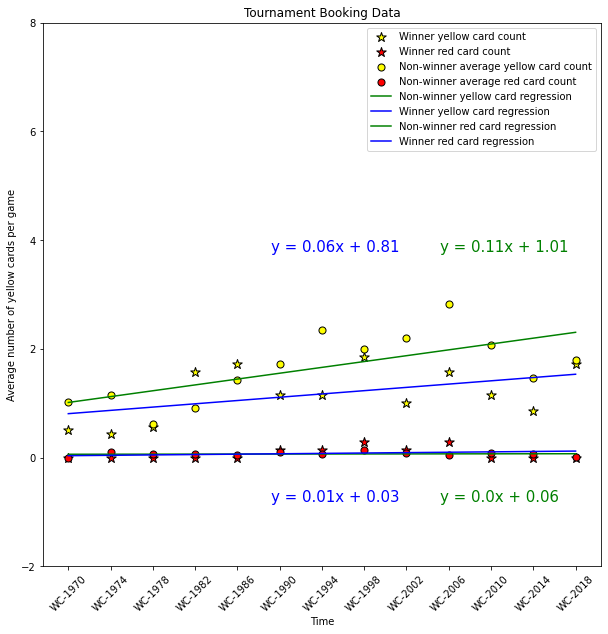

In [104]:
plt.figure(figsize=(10,10))
plt.scatter(tournaments, winner_yellow_card_count , marker= '*',s =100, facecolors="yellow", edgecolors="black", label = "Winner Yellow Card")
plt.scatter(tournaments, winner_red_card_count ,marker= '*',s =100, facecolors="red", edgecolors="black", label = "Winner Red Card")
plt.scatter(tournaments, nonwinner_yellow_card_count ,s =50, facecolors="yellow", edgecolors="black", label = "NonWinner Average Yellow Card")
plt.scatter(tournaments, nonwinner_red_card_count ,s =50, facecolors="red", edgecolors="black", label = "NonWinner Average Red Card")
plt.ylim(-2,8)
plt.xlabel("Tournaments")
plt.xticks(rotation=45)
plt.ylabel("Card Count")
plt.title("Tournament Booking Data")
plt.legend(loc='best')

x_values = non_winner_booking_tourn_info['Time']
y_values = non_winner_booking_tourn_info['avg_yellow_card']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( x_values, y_values )
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(8.8,3.8),fontsize=15,color="green")
plt.xlabel("Time")
plt.ylabel('Average number of yellow cards per game')

x_values = winner_booking_info['Time']
y_values = winner_booking_info['avg_yellow_card']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( x_values, y_values )
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(4.8,3.8),fontsize=15,color="blue")
plt.xlabel("Time")
plt.ylabel('Average number of yellow cards per game')

################

x_values = non_winner_booking_tourn_info['Time']
y_values = non_winner_booking_tourn_info['avg_red_card']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( x_values, y_values )
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(8.8,-0.8),fontsize=15,color="green")
#plt.xlabel("Time")
#plt.ylabel('Average number of yellow cards')

#################

x_values = winner_booking_info['Time']
y_values = winner_booking_info['avg_red_card']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress( x_values, y_values )
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(4.8,-0.8),fontsize=15,color="blue")

plt.legend( ( 'Winner yellow card count', 'Winner red card count', 'Non-winner average yellow card count', 'Non-winner average red card count', 'Non-winner yellow card regression','Winner yellow card regression' , 'Non-winner red card regression', 'Winner red card regression' ) )

plt.show()


In [105]:
non_winner_booking_tourn_info

,tournament_id,avg_yellow_card,avg_red_card,Time
0,WC-1970,1.020833,0.000000,0
1,WC-1974,1.157143,0.098413,1
2,WC-1978,0.625850,0.057823,2
3,WC-1982,0.913420,0.057576,3
4,WC-1986,1.426948,0.042100,4
5,WC-1990,1.715217,0.095031,5
6,WC-1994,2.348861,0.065010,6
7,WC-1998,1.995699,0.140630,7
8,WC-2002,2.193088,0.080952,8
9,WC-2006,2.829954,0.049770,9


In [107]:
from scipy import stats
stats.ttest_ind(winner_booking_info['avg_yellow_card'].values,non_winner_booking_tourn_info['avg_yellow_card'].values)

Ttest_indResult(statistic=-2.201810470879714, pvalue=0.03753321465563549)

Null hypothesis: two samples have an identical mean. 
Result: at 5% significance level, this null hypothesis is rejected. This means that these two samples have statistically significantly different mean values. 

In [108]:
stats.ttest_ind(winner_booking_info['avg_red_card'].values,non_winner_booking_tourn_info['avg_red_card'].values)

Ttest_indResult(statistic=0.3438111009101068, pvalue=0.7339823053221999)

Null hypothesis: two samples have an identical mean. 
Result: at 5% significance level, this null hypothesis can not be rejected. This means that these two samples do not have statistically significantly different mean values.